In [1]:
from qiskit import QuantumCircuit, BasicAer, execute
from qiskit.quantum_info.states import Statevector
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

# Simulating Mach-Zehnder

We will explore the experiment here: https://lab.quantumflytrap.com/lab/mach-zehnder 

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('RRi4dv9KgCg?start=188', width=800, height=480)

## We need a simulator of a quantum computer
Let's take the most simple, which is doing matrix multiplication of a statevector.

In [3]:
simulator = BasicAer.get_backend("statevector_simulator")

### This is the "clean" 1-qubit circuit:

In [4]:
circuit = QuantumCircuit(1) # 1 qubit
circuit.draw()  # text version

q:

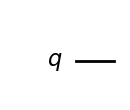

In [5]:
circuit.draw('mpl')  # matplotlib version, may require pylatexenc

### Ok what is the result?

In [6]:
def simulate_and_show(circuit):
    
    display(circuit.draw('mpl'))         # draw a circuit
    job = execute(circuit, simulator)    # obtain the job. local jobs are executed synchronously
    sv = job.result().get_statevector()  # what is the resulting statevector?
    print(sv)
    statevector = Statevector(sv)        # how will it look on a Bloch sphere?
    display(statevector.draw(output='bloch'))

### The photon goes $\rightarrow$

In [ ]:
simulate_and_show(circuit)

### The photon meets beam-splitter: $\frac{1}{\sqrt{2}}(\rightarrow+\downarrow)$

In [ ]:
circuit.h(0)
simulate_and_show(circuit)

### [Optional step] slowing down the photon
We may break the beautiful symmetry, by adding a phase component to the qubit. This will affect the final measurement:

$RZ(\theta)\times\frac{1}{\sqrt{2}}(\rightarrow+\downarrow)=\frac{1}{\sqrt{2}}(\rightarrow+e^{i\theta}\downarrow)$

In [ ]:
theta = 0.0
circuit.rz(theta, 0)
simulate_and_show(circuit)

### The photon reflects at the mirror $\frac{1}{\sqrt{2}}(\downarrow+\rightarrow)$

$|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \xrightarrow{mirrors} \frac{1}{\sqrt{2}}(X|0\rangle+X|1\rangle)=X\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=X|+\rangle= ...$

In [ ]:
circuit.x(0)
simulate_and_show(circuit)

### The photon meets beam-splitter AGAIN

In [ ]:
circuit.h(0)
simulate_and_show(circuit)

In [ ]:
circuit.measure_all()
simulate_and_show(circuit)

In [ ]:
another_simulator = BasicAer.get_backend("qasm_simulator")
counts = execute(circuit, another_simulator, shots=1000).result().get_counts()
print(counts)
plot_histogram(counts)

# Let us try this on a quantum computer!

In [ ]:
from qiskit import IBMQ

IBMQ.save_account(open("../token.ibm").read())
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

available_cloud_backends = provider.backends() 
for backend in available_cloud_backends:
    status = backend.status()
    is_operational = status.operational
    jobs_in_queue = status.pending_jobs
    print(f"{backend.name().ljust(30, ' ')} is online={is_operational}\twith a queue={jobs_in_queue}")

In [ ]:
qpu_simulator = provider.get_backend("ibmq_qasm_simulator")
qpu = provider.get_backend("ibmq_lima")


import qiskit_aer
backend_noise_model = qiskit_aer.noise.NoiseModel.from_backend(qpu)

job = execute(circuit, qpu_simulator, noise_model=backend_noise_model, shots=1000)
# job = execute(circuit, qpu, shots=1000)

job_monitor(job)

In [ ]:
counts = job.result().get_counts()
plot_histogram(counts)